In [2]:
import lifelines
#print(lifelines.__version__)

In [3]:
import lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter
from lifelines import KaplanMeierFitter, WeibullFitter, ExponentialFitter, LogNormalFitter


In [4]:
# data upload 
df = pd.read_csv('telecom_customer_churn_cleaned.csv')
df.head()

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Num_Internet_Features,Has_Multiple_Lines,Churn_status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,0.00,0,381.51,974.81,Stayed,NaN,NaN,5.0,1.0,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,38.33,10,96.21,610.28,Stayed,NaN,NaN,3.0,2.0,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,3.0,1.0,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,6.0,1.0,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,4.0,1.0,1


In [5]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Avg_Monthly_Long_Distance_Charges',
       'Internet_Type', 'Avg_Monthly_GB_Download', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason', 'Num_Internet_Features',
       'Has_Multiple_Lines', 'Churn_status'],
      dtype='object')

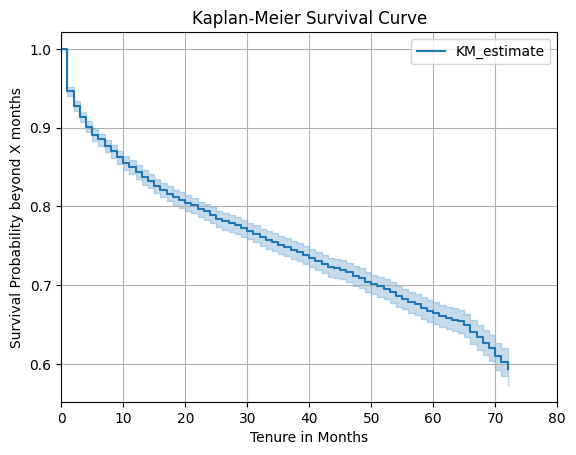

In [20]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the model to the data
kmf.fit(durations=df['Tenure_in_Months'], event_observed=df['Churn_status'])

# Plot the survival function
kmf.plot_survival_function()


plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Tenure in Months')  
plt.ylabel('Survival Probability beyond X months')
plt.xlim(0, 80)     
plt.grid(True)

We notice tight confidence intervals hence we are more certain of point estimates (survival prob) at a particular tenure 

In [7]:
# Finding tenure in months when survival prob is 0.75

sf = kmf.survival_function_
time_when_1 = sf[sf['KM_estimate'] <= 0.9].index.min()
print(f"Time when survival drops below : {time_when_1}")

time_when_2 = sf[sf['KM_estimate'] <= 0.80].index.min()
print(f"Time when survival drops below : {time_when_2}")


Time when survival drops below : 5.0
Time when survival drops below : 22.0


## Analyzing Survival curves between groups

#### Group ( Male vs Female)

In [8]:
# Group 1 vs Group 2 

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']


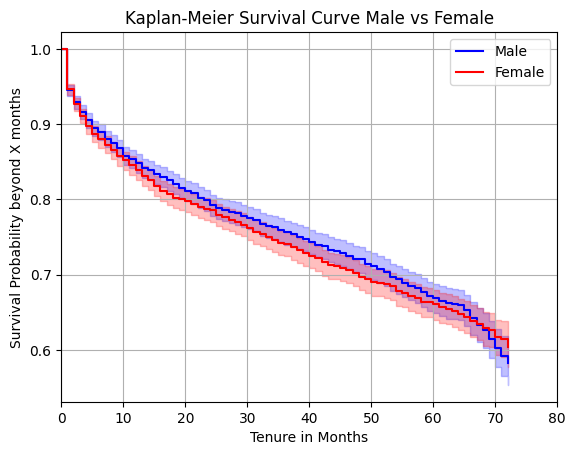

In [9]:
# fitting the model to the data

kmf_male = KaplanMeierFitter()
kmf_male.fit(durations=df_male['Tenure_in_Months'], event_observed=df_male['Churn_status'])

kmf_male.plot_survival_function(label='Male', color='blue')

kmf_female = KaplanMeierFitter()
kmf_female.fit(durations= df_female['Tenure_in_Months'], event_observed = df_female['Churn_status'])

kmf_female.plot_survival_function(label='Female', color='red')

plt.title('Kaplan-Meier Survival Curve Male vs Female')
plt.xlabel('Tenure in Months')
plt.ylabel('Survival Probability beyond X months')
plt.xlim(0, 80)
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# Perform the log-rank test to check if the survival curves are significantly different

lrt = logrank_test(df_male['Tenure_in_Months'], df_female['Tenure_in_Months'],
                    event_observed_A=df_male['Churn_status'], event_observed_B=df_female['Churn_status'])

In [11]:
print("Log-rank test p-value:", lrt.p_value)

Log-rank test p-value: 0.46641465305741214


We notice extremeley p-value which is greater than 0.05, which indicates that the survival curves for the two groups are not significantly different. (Visually it looks like the case also)

#### Group ( Married  vs Unmarried)

In [12]:
# Group 1 vs Group 2 

df_married = df[df['Married'] == 'Yes']
df_unmarried = df[df['Married'] == 'No']


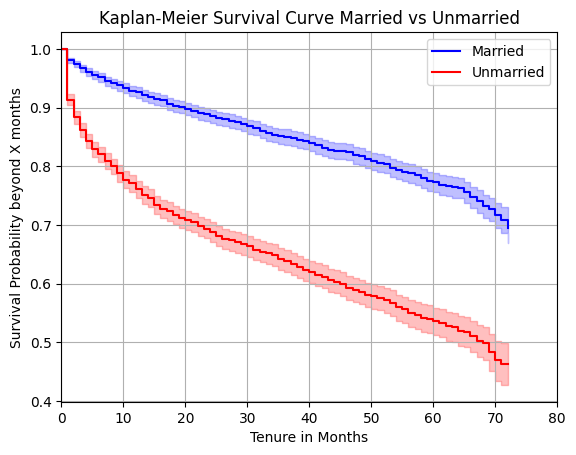

In [13]:
# fitting the model to the data

kmf_married = KaplanMeierFitter()
kmf_married.fit(durations=df_married['Tenure_in_Months'], event_observed=df_married['Churn_status'])

kmf_married.plot_survival_function(label='Married', color='blue')

kmf_unmarried = KaplanMeierFitter()
kmf_unmarried.fit(durations= df_unmarried['Tenure_in_Months'], event_observed = df_unmarried['Churn_status'])

kmf_unmarried.plot_survival_function(label='Unmarried', color='red')

plt.title('Kaplan-Meier Survival Curve Married vs Unmarried')
plt.xlabel('Tenure in Months')
plt.ylabel('Survival Probability beyond X months')
plt.xlim(0, 80)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# Perform the log-rank test to check if the survival curves are significantly different

lrt = logrank_test(df_married['Tenure_in_Months'], df_unmarried['Tenure_in_Months'],
                    event_observed_A=df_married['Churn_status'], event_observed_B=df_unmarried['Churn_status'])

In [15]:
print("Log-rank test p-value:", lrt.p_value)

Log-rank test p-value: 2.489643649204858e-94


###### We notice extremeley small p-value, which indicates that the survival curves for the two groups are significantly different.

#### Finding the best fit parameteric model

##### Log Normal vs Weibull vs Exponential 

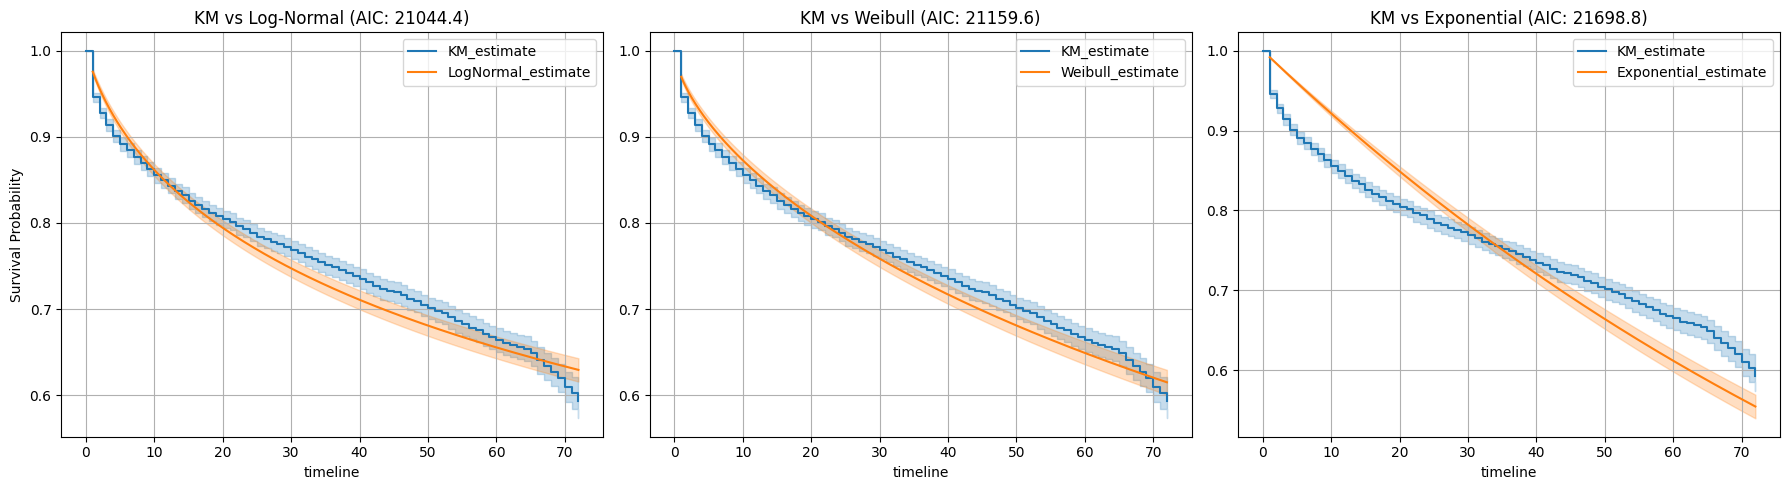

In [16]:

# Assuming df is your DataFrame with 'Tenure_in_Months' and 'Churn_status' columns
T = df['Tenure_in_Months']
E = df['Churn_status']

# Fit all models
kmf = KaplanMeierFitter().fit(T, E)
wb = WeibullFitter().fit(T, E)
exp = ExponentialFitter().fit(T, E)
log = LogNormalFitter().fit(T, E)


# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: KM vs Lognormal
kmf.plot_survival_function(ax=axes[0], ci_show=True)
log.plot_survival_function(ax=axes[0])
axes[0].set_title("KM vs Log-Normal (AIC: {:.1f})".format(log.AIC_))
axes[0].set_ylabel("Survival Probability")
axes[0].grid(True)
axes[0].legend()

# Plot 2: KM vs Weibull
kmf.plot_survival_function(ax=axes[1], ci_show=True)
wb.plot_survival_function(ax=axes[1])
axes[1].set_title("KM vs Weibull (AIC: {:.1f})".format(wb.AIC_))
axes[1].grid(True)
axes[1].legend()

# Plot 3: KM vs Exponential
kmf.plot_survival_function(ax=axes[2], ci_show=True)
exp.plot_survival_function(ax=axes[2])
axes[2].set_title("KM vs Exponential (AIC: {:.1f})".format(exp.AIC_))
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

In [17]:
## Printing the AIC scores for all models
print("AIC Scores:")
print(f"Weibull: {wb.AIC_:.1f}")
print(f"Exponential: {exp.AIC_:.1f}")
print(f"Log-Normal: {log.AIC_:.1f}")

AIC Scores:
Weibull: 21159.6
Exponential: 21698.8
Log-Normal: 21044.4


###### We choose Log Normal basis the fit and AIC scores

### Using Log Normal 

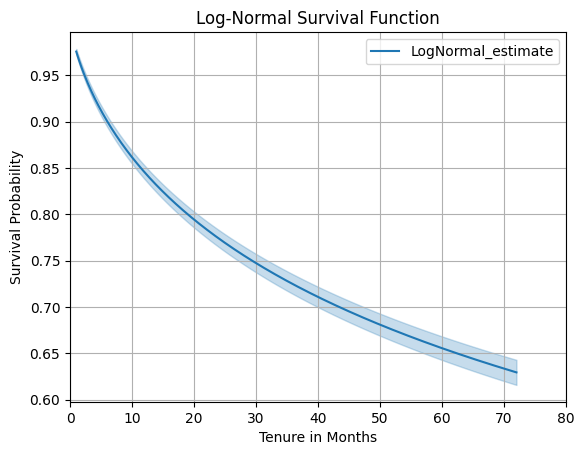

In [18]:
## The log normal survival function 

# Fit the Log-Normal model
lnf = LogNormalFitter()
lnf.fit(T, E)
lnf.plot_survival_function()
plt.title('Log-Normal Survival Function')
plt.xlabel('Tenure in Months')  
plt.ylabel('Survival Probability')
plt.xlim(0, 80)
plt.grid(True)
plt.show()

#### Some predictions

In [19]:
## Predict the no of customer expected to stay back after initial X months 

## Input the number of months you want to predict for 
no_of_months = 12

print(
        f"Perc of customers that will stay back after {no_of_months} months is",
      np.round((1- lnf.predict(no_of_months)) * 100) , "%")

Perc of customers that will stay back after 12 months is 15.0 %
